In [1]:
import matplotlib.pyplot as plt
import math
import random 
import numpy as np
# code to show matplotlib inside Jupyter Notebook
%matplotlib inline 
 

## Picture of distributions

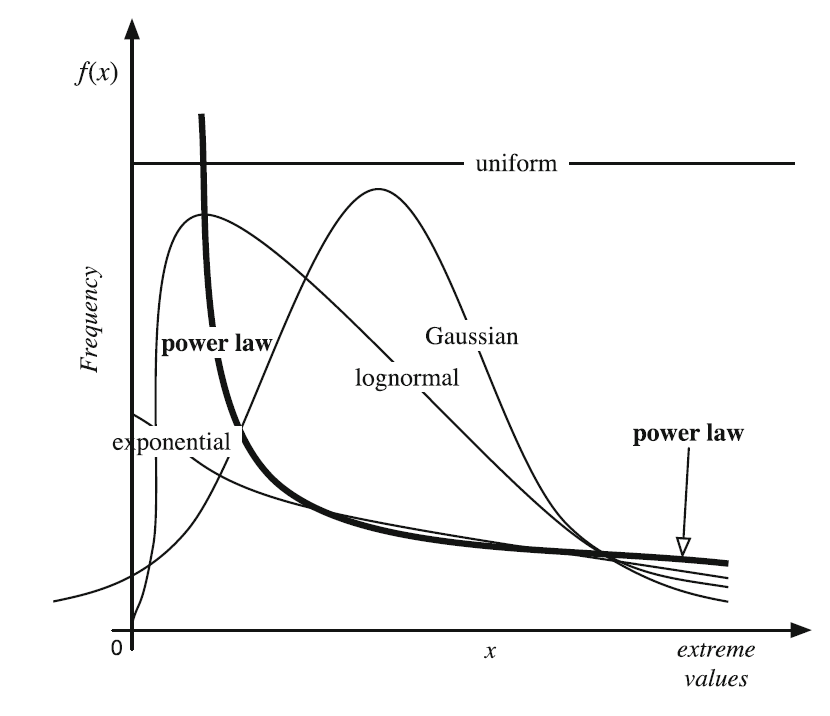

## Let's explore two distributions -- 1st the Gaussian or *normal* distribution

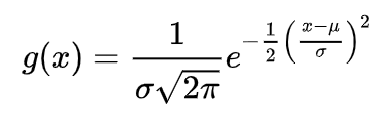

In [2]:
#create function for gaussian plots with the mu and sigma plot
#pdf stand for probability distribution function 
def norm_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return ((math.exp(-(x-mu)**2)/2/sigma**2)/ (sqrt_two_pi * 2))


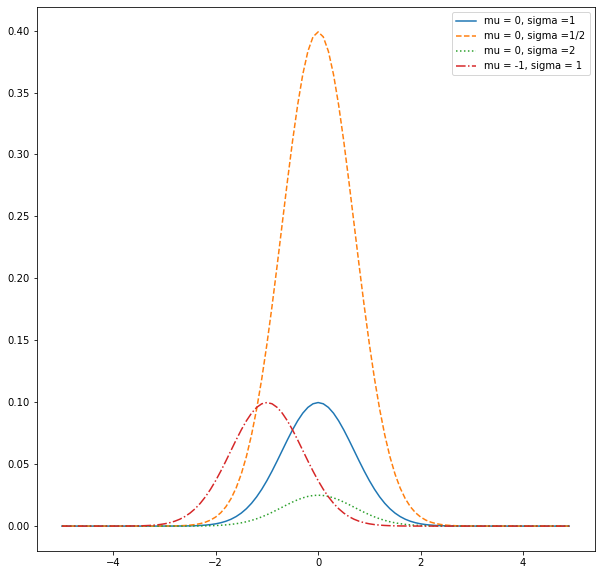

In [3]:
#create X parameter
xs = [x / 10.0 for x in range(-50, 50)]
#change the figure size
plt.figure(figsize =(10,10))
#Plot lines for normal pdf with different parameters
#breadkdown of code xs is a list of x plots, [norm...], creates your list of y plots, '-' is line type,
# label is a Key Word Argument or *KWARG which is then called from the legen function  
plt.plot(xs,[norm_pdf(x, sigma=1) for x in xs], '-', label ='mu = 0, sigma =1')
plt.plot(xs,[norm_pdf(x, sigma=0.5) for x in xs], '--', label ='mu = 0, sigma =1/2')
plt.plot(xs,[norm_pdf(x, sigma=2) for x in xs], ':', label ='mu = 0, sigma =2')
plt.plot(xs,[norm_pdf(x, mu = -1) for x in xs], '-.', label ='mu = -1, sigma = 1')
plt.legend()

# POP QUIZ... What impact does varying mu and sigma have? 

In [4]:
#We have an ideal plot that has some important properties. Probalisticly how can we get this

#One success or failure trial with a probability p of being a success
def bernoulli_trial(p):
    '''
    p is a float between 0 and 1
    '''
    if random.random() < p:
        return 1
    else:
        return 0
    
# A distribution based on a series of Bernoullli trials - so you run the trial X times
def binomial(n,p):
    '''
    n is an integer of the number of bernoulii trials
    
    p is a float between 0 and 1
    '''
    return sum(bernoulli_trial(p) for _ in range(n))

# A dictionary to store each set of trails (e.g. a series of 100 trials, count how many successes)
def Counter(data):
    data_dict = {}
    for d in data: 
        if d in data_dict.keys(): 
            data_dict[d] += 1
        else: 
            data_dict[d] = 1
    
    return data_dict

In [5]:
#A helper function to plot the continuous distribution below this is for the cumulative distribution
def normal_cdf(x, mu=0, sigma= 1):
    return (1+math.erf((x - mu) / math.sqrt(2) /sigma)) / 2

In [7]:
def make_hist(p,n,num_points):
    '''
    task: build a a hsitrogram with continuous distribution to show the guassian distribution     
    
    p is a float between 0 and 1 indicating the probaility of sucess
    
    n is an integer indicating the number of trials within the binomial distirbution 
    
    num_points is an integer of how many binomial distributions of n trials 
    
    '''
    
    #change the figure size
    plt.figure(figsize =(10,10))

    data = [binomial(n,p) for _ in range(num_points)]
    #use bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()],
            [v /num_points for v in histogram.values()], 0.8, color = '0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    #use a line chart to show nomral distributions
    xs  = range(min(data), max(data)+1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    

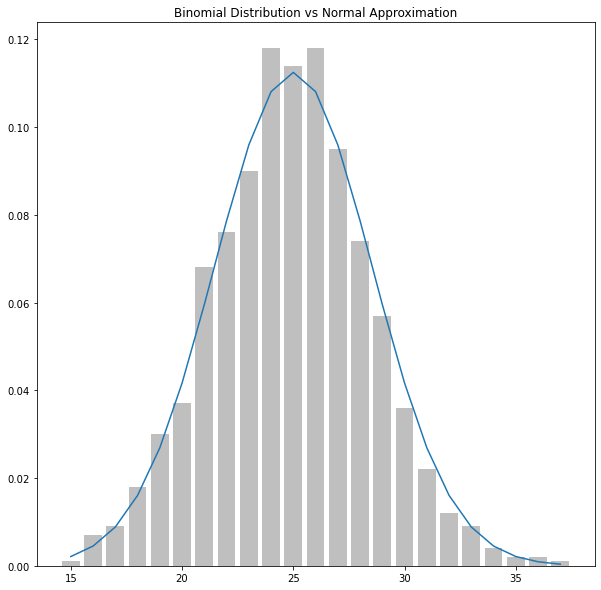

In [9]:
make_hist(0.5, 50, 1000)

## Change the probability and see what happens, then change the other variables and see the impact. 

If you randomly selected people off the street and created a dictionary of heights 
with key being the heights say 71 inches and the value being the count of people with that height you would get a normal distribution and arguable the mu would shift based on where the height of said area say North Korea 

In [10]:
# So a generic distribution of height
num_points = 5000
normal = np.random.normal(69, 4, num_points)
# You have to round the numbers otherwise each even will occur one time --- little decisions matter!!!!!!!!
for n in range(len(normal)): 
    normal[n] = round(normal[n], 2)

<BarContainer object of 1605 artists>

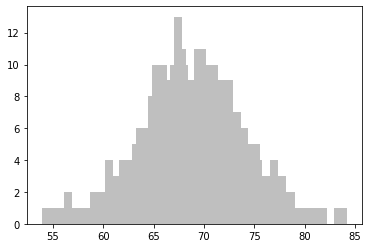

In [11]:
histogram = Counter(normal)
plt.bar([x for x in histogram.keys()],
         [v for v in histogram.values()], 0.8, color = '0.75')


# POP QUIZ increase the number of points - what happens?

In [10]:
### Now lets look at a heavy tailed distribution if the "normal" or guassian distribution is the most studied
### heavy tailed distributions still lack good metrics to even postively identify if it is a true power law 
### (law of preferential attachment) or a lognormal (law of propotional effect) 
### but heavy tails are no less prevalent they are seen in war deaths, wealth disitrbution, firm size, connections in a 
### network, city size.. they are a diagnostic for complexity

In [13]:
a, m = 10, 1000
pareto = (np.random.pareto(a, 100000) +1) * m

Text(0.5, 1.0, 'Pareto Distribution')

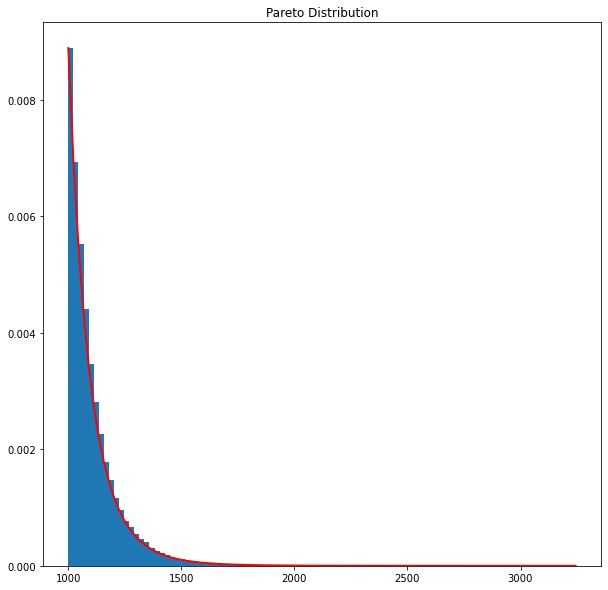

In [14]:
plt.figure(figsize=(10,10))
count, bins, _ = plt.hist(pareto, 100, density = True) #Number of bins matters and even that is a problem in stats
fit = a*m**a /bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth= 2, color = 'r')
plt.title("Pareto Distribution")

In [15]:
#SO inferential statistics try and figure out a probability distribution function for the data. 
#This then gives an indicator of how likely an event is. Knowing the distribution matters because if you 
#predict wealth/firm size or war death based on a guassian distribution you will never predict the large events

In [16]:
#Descriptive statistics then try and describe the data one has, but if you apply them to the wrong distribution 
#you get a false impression 

In [15]:
#The average works well for normal distribution because it gives the middle of the distribution 
sum(normal)/len(normal)

68.96595999999992

In [16]:
#Its does not work well for a powerlaw distribution 
print (sum(pareto)/len(pareto))


1111.0174423168405


In [19]:
#As a real life example in the 1990s the UNC Geography major was the highest paying major because of one student
##--Michael Jordan 

### ABMs then try and find the actual decision making or proces within a foreign population and as validation   see if they match to macro statistics. The idea being allowing the specific underlying dynamics allows for more  effective policy development. 